#### See which energy source produces the most energy per year, which one leads each state, does temperature effect their output?
#### Compare and contrast renewable energy sources (overall)
#### What does population correlate with?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('EngConsumption_Final.csv')
dfNoTot = df[df['ENERGY SOURCE'] != 'Total']
dfTot = df[df['ENERGY SOURCE'] == 'Total']
df

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),POP,AVERAGE_TEMP
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0,633714,15.7
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0,633714,15.7
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0,633714,15.7
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0,633714,15.7
4,2001,1,AK,Total Electric Power Industry,Wind,87.0,633714,15.7
...,...,...,...,...,...,...,...,...
466651,2021,12,WY,"Electric Generators, Electric Utilities",Coal,2408632.0,578803,31.3
466652,2021,12,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,109773.0,578803,31.3
466653,2021,12,WY,"Electric Generators, Electric Utilities",Natural Gas,44421.0,578803,31.3
466654,2021,12,WY,"Electric Generators, Electric Utilities",Petroleum,7181.0,578803,31.3


In [19]:
# First, See which energy source produces the most & least energy per year
dfEP = dfNoTot[dfNoTot['ENERGY SOURCE'] != 'Pumped Storage'] # Removing this, since this will always be negative
sourcePerYear = dfEP[['YEAR','ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['YEAR','ENERGY SOURCE']).sum()
maxSourcePerYear = sourcePerYear[sourcePerYear.groupby(['YEAR'])['GENERATION (Megawatthours)'].transform(max) == sourcePerYear['GENERATION (Megawatthours)']]
minSourcePerYear = sourcePerYear[sourcePerYear.groupby(['YEAR'])['GENERATION (Megawatthours)'].transform(min) == sourcePerYear['GENERATION (Megawatthours)']]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(maxSourcePerYear)
print(minSourcePerYear)

                    GENERATION (Megawatthours)
YEAR ENERGY SOURCE                            
2001 Coal                        3807911878.00
2002 Coal                        3866260688.00
2003 Coal                        3947473492.00
2004 Coal                        3956601107.00
2005 Coal                        4025746100.00
2006 Coal                        3981022276.00
2007 Coal                        4032911168.00
2008 Coal                        3971602503.00
2009 Coal                        3511808516.00
2010 Coal                        3694580531.00
2011 Coal                        3466860011.82
2012 Coal                        3028085890.30
2013 Coal                        3162229432.57
2014 Coal                        3171393227.29
2015 Coal                        2704796391.00
2016 Natural Gas                 2756568487.00
2017 Natural Gas                 2592845612.00
2018 Natural Gas                 2938219834.00
2019 Natural Gas                 3171213328.00
2020 Natural 

In [3]:
pd.reset_option('display.float_format')

In [33]:
# Next see which one leads each state
dfEP = dfNoTot[dfNoTot['ENERGY SOURCE'] != 'Pumped Storage'] # Removing this, since this will always be negative
sourcePerYear = dfEP[dfEP['YEAR']==2021][['STATE','ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['STATE','ENERGY SOURCE']).sum()
maxSourcePerYear = sourcePerYear[sourcePerYear.groupby(['STATE'])['GENERATION (Megawatthours)'].transform(max) == sourcePerYear['GENERATION (Megawatthours)']]
minSourcePerYear = sourcePerYear[sourcePerYear.groupby(['STATE'])['GENERATION (Megawatthours)'].transform(min) == sourcePerYear['GENERATION (Megawatthours)']]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(maxSourcePerYear)
# print(minSourcePerYear)

                                  GENERATION (Megawatthours)
STATE ENERGY SOURCE                                         
AK    Natural Gas                                 4877281.00
AL    Natural Gas                               107573401.00
AR    Coal                                       42837751.00
AZ    Natural Gas                                96372948.00
CA    Natural Gas                               192980100.00
CO    Coal                                       47204084.00
CT    Natural Gas                                49090330.00
DE    Natural Gas                                 6929694.00
FL    Natural Gas                               361204363.00
GA    Natural Gas                               117129242.00
HI    Petroleum                                  12014125.00
IA    Wind                                       73155002.00
ID    Hydroelectric Conventional                 17300180.00
IL    Nuclear                                   193988916.00
IN    Coal              

Text(0.5, 0, 'Energy Source')

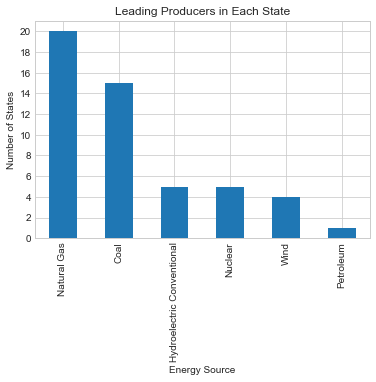

In [46]:
ax = maxSourcePerYear.groupby(['ENERGY SOURCE']).size().sort_values(ascending=False).plot.bar()
ax.set_yticks(np.arange(0, 20+1, 2.0))
ax.set_title('Leading Producers in Each State')
ax.set_ylabel('Number of States')
ax.set_xlabel('Energy Source')

Text(0.5, 0, 'Energy Source')

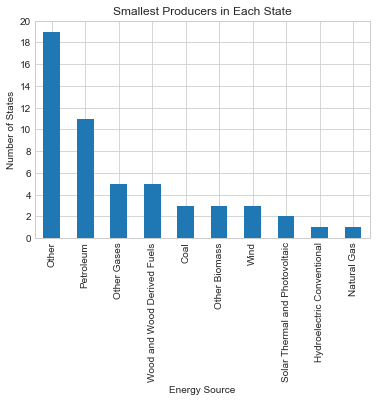

In [47]:
ax = minSourcePerYear.groupby(['ENERGY SOURCE']).size().sort_values(ascending=False).plot.bar()
ax.set_yticks(np.arange(0, 20+1, 2.0))
ax.set_title('Smallest Producers in Each State')
ax.set_ylabel('Number of States')
ax.set_xlabel('Energy Source')

In [5]:
# Finally, does temperature effect their output?
# Close to the tempurature correlates one

In [6]:
# Compare and contrast renewable energy sources (overall)
# https://www.un.org/en/climatechange/what-is-renewable-energy && https://www.eia.gov/energyexplained/renewable-sources/ -- used as a source for renewable energy
Sources = dfNoTot['ENERGY SOURCE'].unique()
print(Sources)
renewableSources = ['Hydroelectric Conventional','Wood and Wood Derived Fuels','Wind','Other Biomass','Solar Thermal and Photovoltaic','Geothermal']

['Coal' 'Petroleum' 'Natural Gas' 'Hydroelectric Conventional' 'Wind'
 'Other Gases' 'Nuclear' 'Wood and Wood Derived Fuels' 'Other Biomass'
 'Other' 'Solar Thermal and Photovoltaic' 'Pumped Storage' 'Geothermal']


In [49]:
# per year
dfREP = dfNoTot[dfNoTot['ENERGY SOURCE'].isin(renewableSources)]
rSourcePerYear = dfREP[['YEAR','ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['YEAR','ENERGY SOURCE']).sum()
maxRSourcePerYear = rSourcePerYear[rSourcePerYear.groupby(['YEAR'])['GENERATION (Megawatthours)'].transform(max) == rSourcePerYear['GENERATION (Megawatthours)']]
minRSourcePerYear = rSourcePerYear[rSourcePerYear.groupby(['YEAR'])['GENERATION (Megawatthours)'].transform(min) == rSourcePerYear['GENERATION (Megawatthours)']]
minRSourcePerYear

,,GENERATION (Megawatthours)
YEAR,ENERGY SOURCE,
2001,Solar Thermal and Photovoltaic,1085510.00
2002,Solar Thermal and Photovoltaic,1109662.00
2003,Solar Thermal and Photovoltaic,1068002.00
2004,Solar Thermal and Photovoltaic,1150314.00
2005,Solar Thermal and Photovoltaic,1100586.00
2006,Solar Thermal and Photovoltaic,1015408.00
2007,Solar Thermal and Photovoltaic,1223584.00
2008,Solar Thermal and Photovoltaic,1728628.00
2009,Solar Thermal and Photovoltaic,1782357.00


In [8]:
# per month
rSourcePerMonth = dfREP[['MONTH','ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['MONTH','ENERGY SOURCE']).sum()
maxRSourcePerMonth = rSourcePerMonth[rSourcePerMonth.groupby(['MONTH'])['GENERATION (Megawatthours)'].transform(max) == rSourcePerMonth['GENERATION (Megawatthours)']]
minRSourcePerMonth = rSourcePerMonth[rSourcePerMonth.groupby(['MONTH'])['GENERATION (Megawatthours)'].transform(min) == rSourcePerMonth['GENERATION (Megawatthours)']]
maxRSourcePerMonth 

,,GENERATION (Megawatthours)
MONTH,ENERGY SOURCE,
1,Hydroelectric Conventional,1000587011.31
2,Hydroelectric Conventional,896695588.28
3,Hydroelectric Conventional,1010760454.08
4,Hydroelectric Conventional,1028478893.75
5,Hydroelectric Conventional,1149518472.81
6,Hydroelectric Conventional,1128770439.87
7,Hydroelectric Conventional,1032459962.56
8,Hydroelectric Conventional,896945074.89
9,Hydroelectric Conventional,738568544.66


In [53]:
# Get the mean for all of them
rSourceMean = dfREP[['ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['ENERGY SOURCE']).mean().sort_values(by='GENERATION (Megawatthours)',ascending=False)
rSourceMean

,GENERATION (Megawatthours)
ENERGY SOURCE,
Hydroelectric Conventional,309510.57
Wind,245882.78
Geothermal,193372.77
Solar Thermal and Photovoltaic,57305.17
Wood and Wood Derived Fuels,57229.02
Other Biomass,17782.58


In [55]:
# Which state uses the most of what?
rSourcePerState = dfREP[['STATE','ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['STATE','ENERGY SOURCE']).sum()
maxRSourcePerState = rSourcePerState[rSourcePerState.groupby(['STATE'])['GENERATION (Megawatthours)'].transform(max) == rSourcePerState['GENERATION (Megawatthours)']]
minRSourcePerState = rSourcePerState[rSourcePerState.groupby(['STATE'])['GENERATION (Megawatthours)'].transform(min) == rSourcePerState['GENERATION (Megawatthours)']]
#maxRSourcePerState

Text(0.5, 0, 'Energy Source')

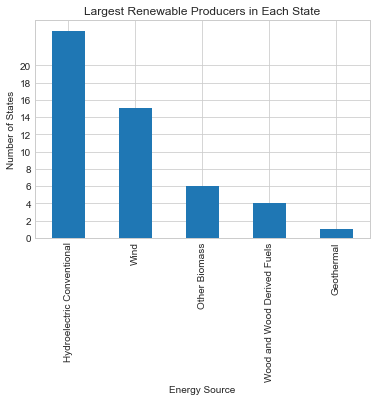

In [58]:
ax = maxRSourcePerState.groupby(['ENERGY SOURCE']).size().sort_values(ascending=False).plot.bar()
ax.set_yticks(np.arange(0, 20+1, 2.0))
ax.set_title('Largest Renewable Producers in Each State')
ax.set_ylabel('Number of States')
ax.set_xlabel('Energy Source')

Text(0.5, 0, 'Energy Source')

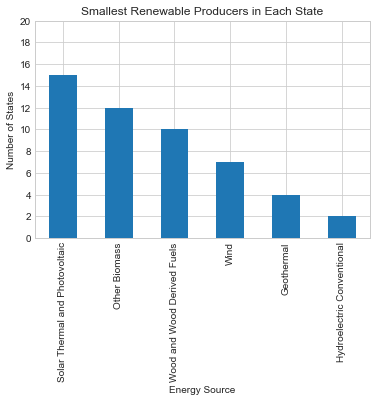

In [57]:
ax = minRSourcePerState.groupby(['ENERGY SOURCE']).size().sort_values(ascending=False).plot.bar()
ax.set_yticks(np.arange(0, 20+1, 2.0))
ax.set_title('Smallest Renewable Producers in Each State')
ax.set_ylabel('Number of States')
ax.set_xlabel('Energy Source')

In [11]:
# Idea! Maybe graph something with energy sources and states?
# Area plot for renewables?
rSourcePerMonth2 = dfREP[['MONTH','ENERGY SOURCE','GENERATION (Megawatthours)']].groupby(['MONTH','ENERGY SOURCE']).sum().reset_index().rename({'GENERATION (Megawatthours)':'GENERATION'},axis=1)
rSourcePerMonth2['GENERATION']=rSourcePerMonth2['GENERATION'].apply(lambda x: round(x/1000000,3))
newDf = pd.DataFrame({'MONTH':range(1,13)})
for e in renewableSources:
    newDf = newDf.merge(rSourcePerMonth2[rSourcePerMonth2['ENERGY SOURCE']==e].drop('ENERGY SOURCE',axis=1).rename({'GENERATION':e},axis=1))

In [68]:
newDf

,MONTH,Hydroelectric Conventional,Wood and Wood Derived Fuels,Wind,Other Biomass,Solar Thermal and Photovoltaic,Geothermal
0,1,1000.59,142.18,487.33,64.31,46.84,54.85
1,2,896.70,128.10,463.76,58.48,55.89,50.07
2,3,1010.76,134.50,547.22,64.96,77.38,54.84
3,4,1028.48,124.37,560.97,62.76,90.35,51.55
4,5,1149.52,128.06,517.19,65.05,103.67,53.61
5,6,1128.77,134.82,471.34,64.40,107.39,52.78
6,7,1032.46,144.47,389.37,67.29,107.71,54.73
7,8,896.95,145.29,380.52,67.03,104.35,54.51
8,9,738.57,134.78,412.44,63.05,93.46,52.98
9,10,738.61,132.75,504.96,63.81,81.68,53.30


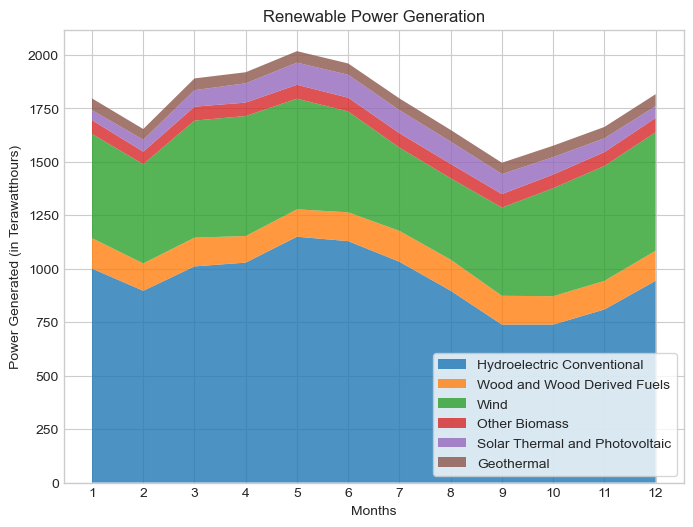

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# # Make the grid
# g = sns.FacetGrid(rSourcePerMonth2, col='ENERGY SOURCE', hue='ENERGY SOURCE', col_wrap=3)
# # Add the line over the area with the plot function
# g = g.map(plt.plot, 'MONTH', 'GENERATION (Megawatthours)')
 
# # Fill the area with fill_between
# g = g.map(plt.fill_between, 'MONTH', 'GENERATION (Megawatthours)', alpha=0.2).set_titles("{col_name} ENERGY SOURCE")
 
# # Control the title of each facet
# g = g.set_titles("{col_name}")
 
# # Add a title for the whole plot
# g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 6), dpi=100)
plt.stackplot(range(1,13),newDf['Hydroelectric Conventional'],newDf['Wood and Wood Derived Fuels'],newDf['Wind'],
            newDf['Other Biomass'],newDf['Solar Thermal and Photovoltaic'],newDf['Geothermal'], labels=renewableSources,alpha=0.8)
plt.title('Renewable Power Generation')
plt.ylabel('Power Generated (in Terawatthours)')
plt.xlabel('Months')
plt.legend(loc=4, frameon=True)
plt.xticks(np.arange(1, 12+1, 1.0))

# Show the graph
plt.show()

In [14]:
# What does population correlate with?
corrPop = dfTot.corr()
# Do we need to remove anything?
rem = corrPop.index.to_list()
rem.pop(3)
print(rem)
corrPop=corrPop.drop(rem,axis=1).drop('POP',axis=0).sort_values('POP',ascending=False)
corrPop

['YEAR', 'MONTH', 'GENERATION (Megawatthours)', 'AVERAGE_TEMP']


,POP
GENERATION (Megawatthours),0.38
AVERAGE_TEMP,0.15
YEAR,0.04
MONTH,-0.00


In [15]:
# Makes a scatter plot of the departure delays and the feature most correlated with the delays. 8
#AWND = Max wind speed for day - feature most correlated with the delays (although, very low...)
corrPopPlot = pd.DataFrame(dfTot[['GENERATION (Megawatthours)','POP']].reset_index(drop=True)).rename({'GENERATION (Megawatthours)':'GENERATION'},axis=1)
# corrPopPlot = corrPopPlot.groupby(corrPopPlot.columns.tolist(),as_index=False)

In [16]:
corrPopPlot['POP']=corrPopPlot['POP'].apply(lambda x: round(x/1000000,3))
corrPopPlot['GENERATION']=corrPopPlot['GENERATION'].apply(lambda x: round(x/1000,3))
corrPopPlot = corrPopPlot.rename({'POP':'POP (Millions)','GENERATION':'GENERATION (Gigawatthours)'},axis=1)
# corrPopPlot

Regression Line slope and y intercept: Graph 1 m = 0.0006, b = 5.0538


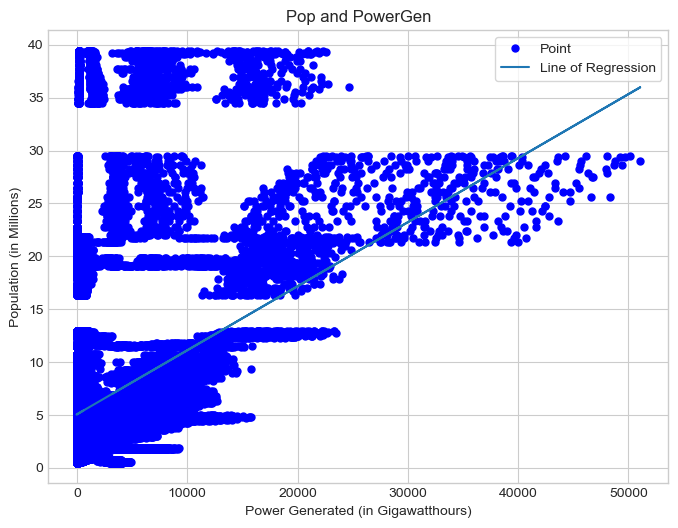

In [17]:

# Matplotlib
# First plot is with delayed flights
y1 = corrPopPlot['POP (Millions)']
x1 = corrPopPlot['GENERATION (Gigawatthours)']
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(
    x1,
    y1,
     'o',
    color='blue',
    ms=5,
    label='Point'
)
# Regression Line
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1+b1, label='Line of Regression')
# Labels and legend
plt.title('Pop and PowerGen')
plt.ylabel('Population (in Millions)')
plt.xlabel('Power Generated (in Gigawatthours)')
plt.legend(loc="upper right", frameon=True)

# plots it
plt.show
print('Regression Line slope and y intercept: Graph 1 m = {:.4f}, b = {:.4f}'.format(m1,b1))

In [69]:
#mean
AVERAGE_TEMP = df['AVERAGE_TEMP'].mean()
print(AVERAGE_TEMP)

53.32712104847148


In [70]:
df['GENERATION (Megawatthours)'].nlargest()

414377   51055346.00
463208   50140604.00
438767   49676326.00
389975   49377625.00
438818   49269594.00
Name: GENERATION (Megawatthours), dtype: float64

In [71]:
df['GENERATION (Megawatthours)'].nsmallest()

37262   -316725.00
37273   -316725.00
17346   -303608.00
17356   -303608.00
17249   -290714.00
Name: GENERATION (Megawatthours), dtype: float64

In [72]:
#correlates
df['MONTH'].corr(df['YEAR'])

-0.0005949855568469296

<AxesSubplot:>

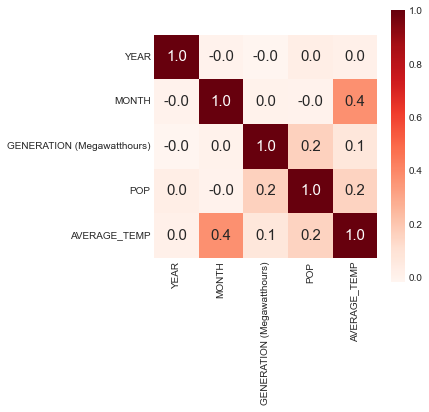

In [73]:
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')